In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [126]:
# Using function to import datasets

import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Set seaborn style directly
sns.set(style="whitegrid")

In [127]:
# STEP 1 :: Generate Dummy datasets

X, y = make_blobs(n_samples = 2000, n_features = 2,cluster_std= 3, centers = 2, random_state = 42)
n_features = 2

print(X.shape, y.shape)

(2000, 2) (2000,)


In [128]:
print(y)


[0 0 0 ... 1 0 1]


In [129]:
#   STEP :: 2 :: Visualizing datasets

def visualise(X, y):
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis")
  #c : --> Color scheme, Cmap :--> Type color scheme you want to see
  plt.show()

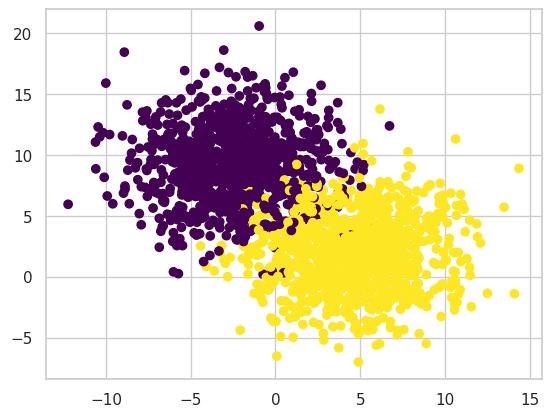

In [130]:
visualise(X, y)

In [131]:
# NORMALISING the data

# 0 mean and 1 std

def normalise(X):
  u = X.mean(axis=0)
  std = X.std(axis=0)

  return (X - u)/ std

In [132]:
X = normalise(X)


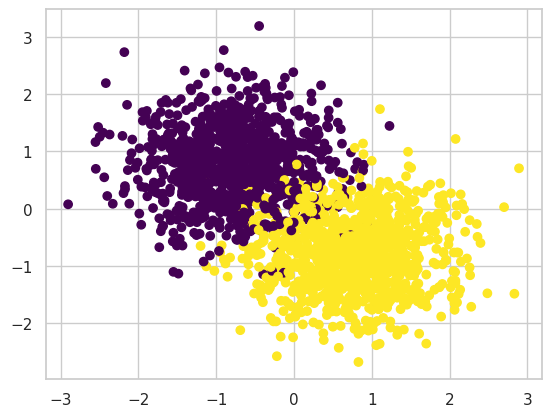

In [133]:
visualise(X, y)

In [134]:
# STEP - 3 :: TRAIN TEST SPLIT
# using inbuilt one Function from SKLEARN library

from sklearn.model_selection import train_test_split

In [135]:
# XT, yT :: Training Data
# Xt, yt :: Testing Data

XT, Xt,yT, yt = train_test_split(X, y, test_size = 0.25, shuffle=False, random_state=0)
print(XT.shape, yT.shape)
print(Xt.shape, yt.shape)

(1500, 2) (1500,)
(500, 2) (500,)


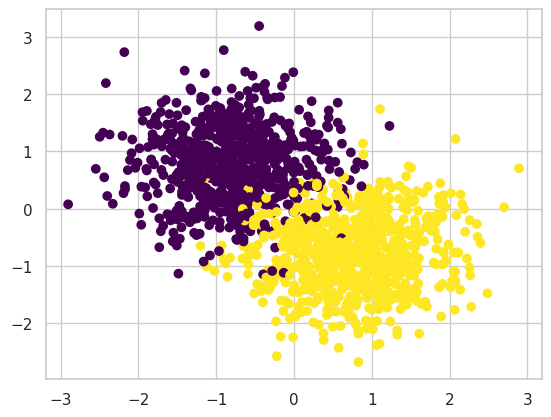

In [136]:
# Training Data

visualise(XT,yT)

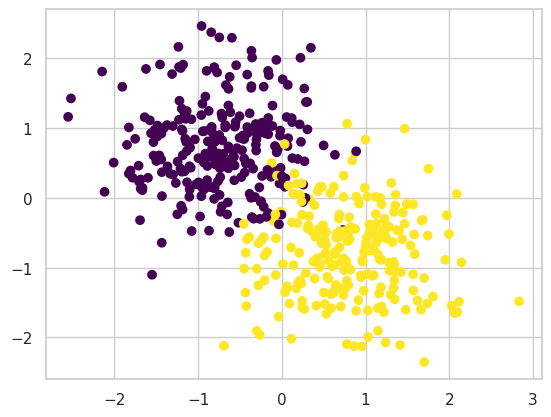

In [137]:
#Testing data

visualise(Xt, yt)

## **Hypothesis / Logit Model**

In [167]:
# Modelling

def sigmoid(z):
    return 1/(1 + np.exp(-z))

# HYPOTHESIS Function
def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))


## **Binary Cross Entropy Loss**

In [168]:
# Binary Cross Entropy

def error(y, y_pred):
  loss = -np.mean(y+np.log(y_pred) + (1- y)*np.log(1 - y_pred))
  return loss


In [169]:
def gradient(X, y, y_pred):
  # Average --> Mean
  # NO. OF examples ;
  m = X.shape[0]
  grad = -(1/m)*np.dot(X.T, (y-y_pred))
  return grad

## **Training Loop**

In [170]:
def train(X,y, max_iters = 100, learning_rate = 0.1):
  n_features = 2 # from above
# Randomly initialised theta
  theta = np.random.randn(n_features + 1, 1)

  # Performing Gradient descent
  for i in range(max_iters):
    y_pred = hypothesis(X, theta)
    # Why need Predictions ::--> How Much Error I'm making on this Predictions

    error_list = [ ]
    e = error(y, y_pred)
    error_list.append(e)
    grad = gradient(X,y,y_pred)
    theta = theta - learning_rate*grad

  plt.plot(error_list)
  return theta

In [171]:
def addextracol(X):
  if X.shape[1] == n_features:
    ones = np.ones((X.shape[0], 1))
    X  = np.hstack((ones, X ))
  return X

In [172]:
print(X)

[[-1.43211741  0.65078613]
 [-0.47100516  0.87372191]
 [-0.40182883  2.1275269 ]
 ...
 [ 1.96970601 -0.24632291]
 [-0.80805197 -0.01411826]
 [ 0.83964924  0.53655099]]


In [173]:
# In above we have only two coloumns

XT = addextracol(XT)
print(XT)

[[ 1.         -1.43211741  0.65078613]
 [ 1.         -0.47100516  0.87372191]
 [ 1.         -0.40182883  2.1275269 ]
 ...
 [ 1.          0.02390726  0.74454457]
 [ 1.         -0.35936993  0.18771848]
 [ 1.          1.09360417 -1.10077065]]


In [174]:
Xt = addextracol(Xt)
print(Xt)
# tESTING dATA

[[ 1.         -1.17860853  1.9119189 ]
 [ 1.          0.70445084 -1.55536144]
 [ 1.          0.39063944 -0.10336496]
 ...
 [ 1.          1.96970601 -0.24632291]
 [ 1.         -0.80805197 -0.01411826]
 [ 1.          0.83964924  0.53655099]]


In [175]:
#Reshaping the Y

yT = yT.reshape(-1, 1)
yt = yt.reshape(-1, 1)

In [176]:
print(yT.shape)
print(yt.shape)
#both of them are coloumn vector

(1500, 1)
(500, 1)


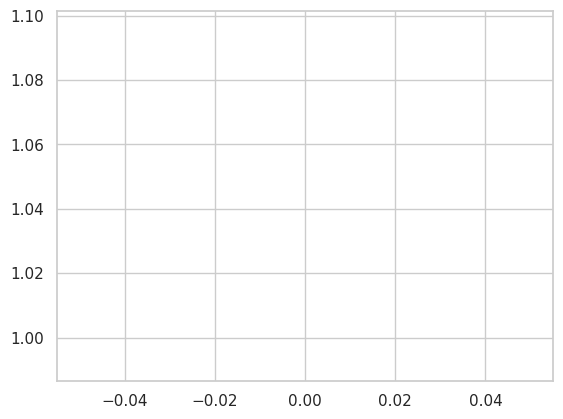

In [177]:
theta = train(XT,yT)

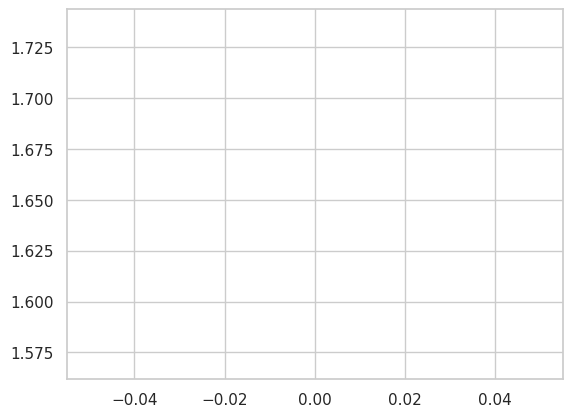

In [178]:
# Incresing learning rate

theta = train(XT,yT,max_iters=300,learning_rate=0.2)

In [179]:
# THETA This Represents a line
theta

array([[ 0.03151854],
       [ 2.52505632],
       [-2.66402355]])

## **Visualise Decision Boundary**

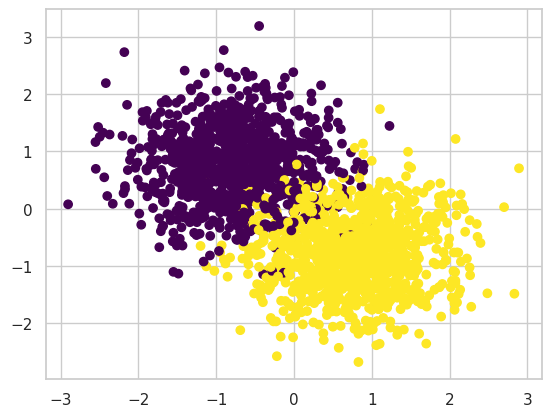

In [180]:
plt.scatter(X[:,0], X[:, 1], c=y, cmap="viridis")
plt.show()

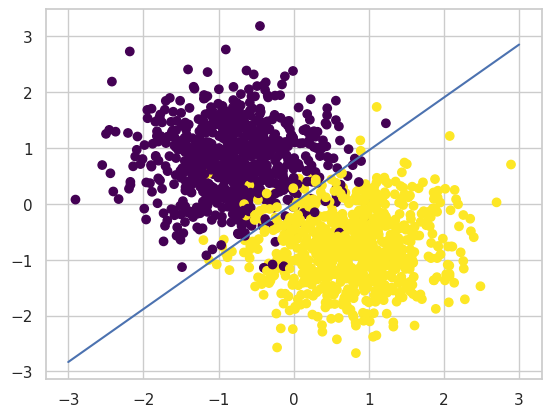

In [181]:
# Let's plot Training data because it is Normalised

# Since we have 3 Columns so take first( 1 ) and second ( 2 ) Column
plt.scatter(XT[:,1], XT[:, 2], c=yT, cmap="viridis")
# will give you 6 points at equal interval of space
x1 = np.linspace(-3, 3, 6)
x2 = -(theta[0] + theta[1]*x1)/theta[2]
plt.plot(x1, x2)
plt.show()

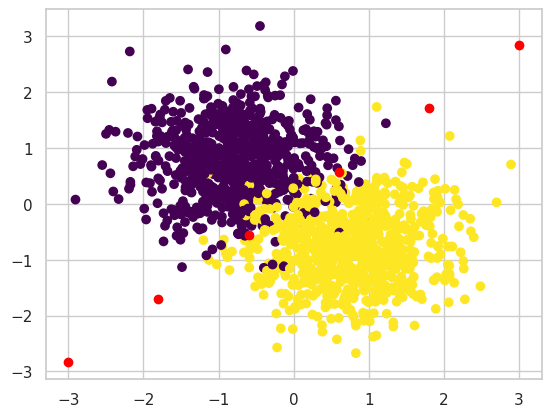

In [182]:
# If you want to see what points are x1 && x2

plt.scatter(XT[:,1], XT[:, 2], c=yT, cmap="viridis")
x1 = np.linspace(-3, 3, 6)
x2 = -(theta[0] + theta[1]*x1)/theta[2]  # can also be written as -(theta[0][0] + theta[1][0]*x1)/theta[2][0]
plt.scatter(x1, x2, color ="red")
plt.show()

## **Predictions && Accuracy**



In [183]:
# PREDICTIONS

def predict(X, theta):
  h = hypothesis(X, theta)
  preds = np.zeros((X.shape[0], 1))

  preds[h >= 0.5] = 1
  #Wheresoever probability greater than 0.5 make it as One
  return preds

In [186]:
# Predictions
preds = predict(Xt,theta)
preds

# Since it gives you float value let's put it as int

array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],

In [187]:
def predict(X, theta):
  h = hypothesis(X, theta)
  preds = np.zeros((X.shape[0], 1), dtype = 'int')

  preds[h >= 0.5] = 1
  #Wheresoever probability greater than 0.5 make it as One
  return preds

In [188]:
predict(Xt, theta)

array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
    

In [189]:
# Checking Accuracy

def accuracy(X, y, theta):
  preds = predict(X, theta)
  return ((y == preds).sum())/ y.shape[0]*100

In [190]:
# Accuracy

accuracy(XT, yT, theta)

95.86666666666666

In [191]:
# ACCURACY ON TEST Data

accuracy(Xt, yt, theta)

96.39999999999999